In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import re
import nltk
import pandas as pd
import nltk as nlp
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
stopWords = set(stopwords.words('turkish'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis Turkish/train 2.csv', encoding= 'unicode_escape')
df_train.head()

,Unnamed: 0,comment,Label
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1


In [4]:
df_test = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis Turkish/test.csv', encoding= 'unicode_escape')
df_test.head()

,Unnamed: 0,comment,Label
0,0,arkadaslar film bence cok güzel su anda gidile...,1
1,1,mükemmel bir film ve sonu enfes. mutlaka izley...,1
2,2,epey bi uzak durun diyorum..bu ne ya iyice cil...,0
3,3,"sürükleyici bir aksiyon, özellikle sonu çok sa...",1
4,4,hayatimda izledigim en berbat filmdi gerçekten...,0


In [5]:
def pre_processing(text):
    text = text.lower()  #Büyük harften -Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text=nltk.word_tokenize(text) # splits the words that are in the sentence from each other.
    text =[word for word in text if not word in set(stopwords.words("turkish"))]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text] # this code finds the root of the word for a word in the sentence and change them to their root form.
    text=" ".join(text)
    return text

In [6]:
df_train["clean_text"]=df_train["comment"].apply(lambda x: pre_processing(x))
df_test["clean_text"]=df_test["comment"].apply(lambda x: pre_processing(x))

In [7]:
df_train.head()

,Unnamed: 0,comment,Label,clean_text
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0,bana filmde benim anlamadigim bisey oldugunu s...
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1,çocuklar ilk filmin sonunda büyüdüler filmde b...
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0,film biraz uzun sürse harbi kiyameti görecektik
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0,pek orjinal bi cinayet yok orjinal oyuncular v...
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1,film tek kelimeyle muhtesemdi heleki sonundaki...


In [8]:
X_train=df_train["clean_text"]
X_test=df_test["clean_text"]
y_train=df_train["Label"]
y_test=df_test["Label"]

print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (7996,)
x_test (2666,)
y_train (7996,)
y_test (2666,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
LogisticRegression = Pipeline([('tfidf', TfidfVectorizer()),('clf', LogisticRegression())])

LogisticRegression .fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [10]:
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

CV average score: 0.89
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1333
           1       0.90      0.88      0.89      1333

    accuracy                           0.89      2666
   macro avg       0.89      0.89      0.89      2666
weighted avg       0.89      0.89      0.89      2666

Train Accuracy : 0.952
Test Accuracy : 0.890
0.8902347849193588 : is the precision score
0.8900975243810954 : is the recall score
0.8900878593024191 : is the f1 score


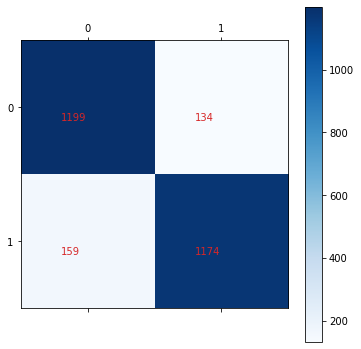

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

cv_scores = cross_val_score(LogisticRegression, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

result = LogisticRegression.predict(X_test)
cr = classification_report(y_test, result)
print(cr) 


print('Train Accuracy : %.3f'%LogisticRegression.score(X_train, y_train))
print('Test Accuracy : %.3f'%LogisticRegression.score(X_test, y_test))



y_pred = LogisticRegression.predict(X_test)
print(precision_score(y_test, y_pred ,average='macro') , ": is the precision score")
print(recall_score(y_test, y_pred,average='macro'), ": is the recall score")
print(f1_score(y_test, y_pred ,average='macro'), ": is the f1 score")

plot_confusion_matrix(y_test, LogisticRegression.predict(X_test))

In [12]:
!pip install requests
!pip install html5lib
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import requests
from bs4 import BeautifulSoup
import csv
   
URL = "https://www.hdfilmcehennemi.life/where-the-crawdads-sing-285/"
r = requests.get(URL)

soup = BeautifulSoup(r.content, 'html.parser')
#print(soup)
quotes=[]  # a list to store quotes

text=soup.find("div",{"class":"card-body text-white"})

text2=text.find_all("p",{"class":"text-justify comment-text text-break mb-2 text-white-50"})
#print(text2)

comment_list=[]
for i in text2:
  comment_list.append(i.text)
# text2_2=text.find_all("ul")
print(comment_list[0])

Film çok güzeldi tavsiye ederim olumsuz yorumlara aldırmayın duygusal olmayanlar bu filmi pek beğenmez


In [16]:
for i in range(len(comment_list)):

  prediction=LogisticRegression.predict([comment_list[i]])
  proportion=LogisticRegression.predict_proba([comment_list[i]])

  if prediction[0]==1:
    print(comment_list[i]," is: ",proportion[0][1]," Positive")
  else:
    print(comment_list[i]," is: ",proportion[0][0]," Negative")


Film çok güzeldi tavsiye ederim olumsuz yorumlara aldırmayın duygusal olmayanlar bu filmi pek beğenmez  is:  0.8402523205922611  Positive
Kızarmış yeşil domatesler, kusursuz dünya, one Day, yedi yaşam, morrie ile her salı filmlerini de şöyle bir yad ettim bu filmi izlerken. Yaşam denen bu yolda sona gelindiginde aslında önemli olan tek şeyin hayatimiza dokunan insanlarin sevgisinin, dostlugunun olduğunu hissettiriyor. Her ne kadar kötü olaylar yaşansa da , hüzün, ölüm olsa da film bittiğinde aklimda kalan tek şey sevgi...O nedenle bu tarz filmleri seviyorum...  is:  0.6039763355623954  Negative
Sabah kuşağını izleyen hanımlara göre bir film.  is:  0.5157982902475975  Positive
Ne baş yapıtı ne harika ötesi, normal bi film. Fazla bi olayı yok yani.  is:  0.791313798801816  Positive
Yorumlara bakarak izledim. Başyapıt harika ötesi fln. Arkadaşlar başyapıt film Esaretin bedeli, American History X, Leon gelir akla. Film izlettirdi kendini ama başyapıt değil. Yükleyen arkadaşların emegine sa